In [1]:
import os

os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

In [2]:
import sys
sys.path.append('..')

from datetime import datetime

import numpy as np
import pandas as pd
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow

import brasa

man = brasa.engine.CacheManager()

In [3]:
from bizdays import Calendar, set_option

set_option("mode", "pandas")
cal = Calendar.load("B3")

In [4]:
df = brasa.get_dataset("b3-cotahist")\
    .filter(pc.field("symbol") == "MGLU3")\
    .filter(pc.field("refdate") >= datetime(2018, 1, 1))\
    .to_table()\
    .to_pandas()

<Axes: xlabel='refdate'>

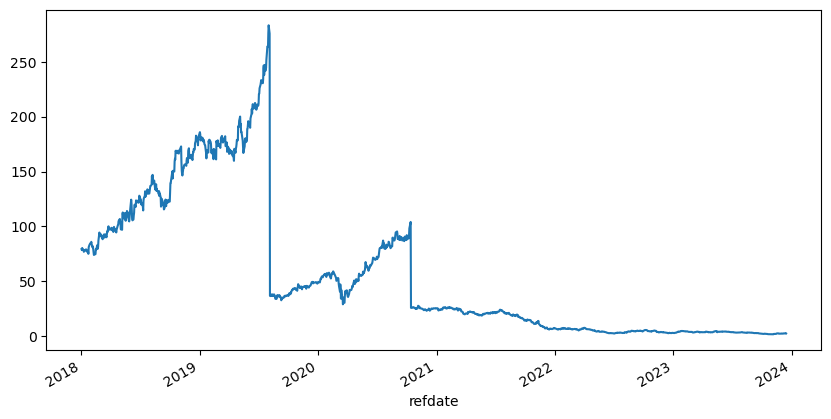

In [9]:
df.set_index("refdate")["close"].plot(figsize=(10, 5))

<Axes: >

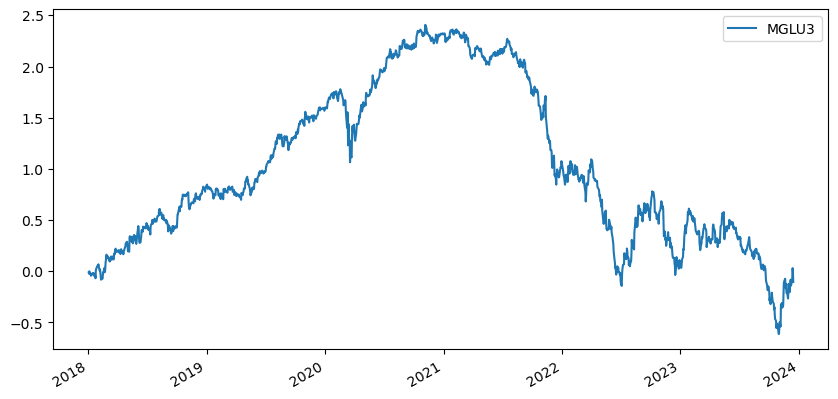

In [8]:
rets = brasa.get_returns("MGLU3", start=datetime(2018, 1, 1))
rets.cumsum().plot(figsize=(10, 5))